<a href="https://colab.research.google.com/github/abdelmonem808/Artificial-Intelligence-and-Machine-Vision/blob/main/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/model_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (8,223 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [6]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import pytesseract as pt
import random
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
from glob import glob
from skimage import io
from shutil import copy
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [28]:
#!rm -r /content/Artificial-Intelligence-and-Machine-Vision

In [9]:
!git clone https://github.com/abdelmonem808/Artificial-Intelligence-and-Machine-Vision
path = '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images'

%cd urldata #go to the directory where git clone says *Cloning into*

for subdir, dirs, files in os.walk(path):
  print(files)

Cloning into 'Artificial-Intelligence-and-Machine-Vision'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 171 (delta 30), reused 0 (delta 0), pack-reused 124
Receiving objects: 100% (171/171), 23.62 MiB | 34.96 MiB/s, done.
Resolving deltas: 100% (87/87), done.
[Errno 2] No such file or directory: 'urldata #go to the directory where git clone says *Cloning into*'
/content
['Cars42.png', 'Cars34.xml', 'Cars38.png', 'Cars28.png', 'Cars0.png', 'Cars31.xml', 'Cars37.png', 'Cars22.xml', 'Cars49.png', 'Cars37.xml', 'Cars36.xml', 'Cars20.png', 'Cars17.png', 'Cars33.png', 'Cars20.xml', 'Cars0.xml', 'Cars23.xml', 'Cars12.png', 'Cars19.png', 'Cars49.xml', 'Cars2.xml', 'Cars31.png', 'Cars47.png', 'Cars24.png', 'Cars18.png', 'Cars43.png', 'Cars33.xml', 'Cars10.xml', 'Cars10.png', 'Cars16.xml', 'Cars13.png', 'Cars12.xml', 'Cars34.png', 'Cars8.png', 'Cars4.png', 'Cars25.png', 'Cars39.xml', 'Cars14

In [10]:
path = glob('/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/*.xml')
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:

    info = xet.parse(filename)
    root = info.getroot()
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

    labels_dict['filepath'].append(filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

In [11]:
df = pd.DataFrame(labels_dict)
df.to_csv('../labels.csv',index=False)
df.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/Artificial-Intelligence-and-Machine-V...,147,260,181,206
1,/content/Artificial-Intelligence-and-Machine-V...,286,400,173,211
2,/content/Artificial-Intelligence-and-Machine-V...,207,260,104,116
3,/content/Artificial-Intelligence-and-Machine-V...,146,246,114,163
4,/content/Artificial-Intelligence-and-Machine-V...,203,285,193,229


In [12]:
filename = df['filepath'][0]
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath_image = os.path.join('/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images',filename_image)
    return filepath_image
getFilename(filename)

'/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars34.png'

In [13]:
image_path = list(df['filepath'].apply(getFilename))
image_path[:10]#random check

['/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars34.png',
 '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars31.png',
 '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars22.png',
 '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars37.png',
 '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars36.png',
 '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars20.png',
 '/content/Artificial-Intelligence-and-Machine-Visio


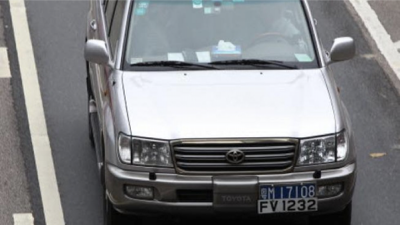

In [14]:
file_path = image_path[47] #path of our image
img = cv2.imread(file_path) #read the image
img = io.imread(file_path) #Read the image
fig = px.imshow(img)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure with bounding box')
fig.add_shape(type='rect',x0=143, x1=211, y0=171, y1=171, xref='x', yref='y',line_color='cyan')

In [15]:
#Targeting all our values in array selecting all columns
labels = df.iloc[:,1:].values
data = []
output = []
for ind in range(len(image_path)):
    image = image_path[ind]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # Prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # Normalization
    # Normalization to labels
    xmin,xmax,ymin,ymax = labels[ind]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # Normalized output
    # Append
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [16]:
# Convert data to array
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [17]:
# Split the data into training and testing set using sklearn.
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40, 224, 224, 3), (10, 224, 224, 3), (40, 4), (10, 4))

In [18]:
inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False, input_tensor=Input(shape=(224,224,3)))
# ---------------------
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation="relu")(headmodel)
headmodel = Dense(250,activation="relu")(headmodel)
headmodel = Dense(4,activation='sigmoid')(headmodel)


# ---------- model
model = Model(inputs=inception_resnet.input,outputs=headmodel)

219055592/219055592 [==============================] - 1s 0us/step


In [27]:
# Complie model
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [29]:
tfb = TensorBoard('/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/object_detection')
history = model.fit(x=x_train,y=y_train,batch_size=10,epochs=10,
                    validation_data=(x_test,y_test),callbacks=[tfb])

Epoch 1/10
4/4 [==============================] - 110s 13s/step - loss: 0.0363 - val_loss: 0.0848
Epoch 2/10
4/4 [==============================] - 48s 12s/step - loss: 0.0372 - val_loss: 0.0691
Epoch 3/10
4/4 [==============================] - 47s 12s/step - loss: 0.0146 - val_loss: 0.0645
Epoch 4/10
4/4 [==============================] - 46s 12s/step - loss: 0.0102 - val_loss: 0.0743
Epoch 5/10
4/4 [==============================] - 47s 12s/step - loss: 0.0159 - val_loss: 0.0534
Epoch 6/10
4/4 [==============================] - 44s 11s/step - loss: 0.0101 - val_loss: 0.0575
Epoch 7/10
4/4 [==============================] - 46s 12s/step - loss: 0.0085 - val_loss: 0.0663
Epoch 8/10
4/4 [==============================] - 44s 11s/step - loss: 0.0071 - val_loss: 0.0546
Epoch 9/10
4/4 [==============================] - 47s 12s/step - loss: 0.0055 - val_loss: 0.0590
Epoch 10/10
4/4 [==============================] - 45s 11s/step - loss: 0.0072 - val_loss: 0.0526


In [30]:
model.save('./Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/object_detection.h5')

In [31]:
# Load model
model = tf.keras.models.load_model('./Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/object_detection.h5')
print('Model loaded Sucessfully')

Model loaded Sucessfully


In [32]:
path = '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars0.png'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # Convert into array and get the normalized output

# Size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 268
Width of the image = 500



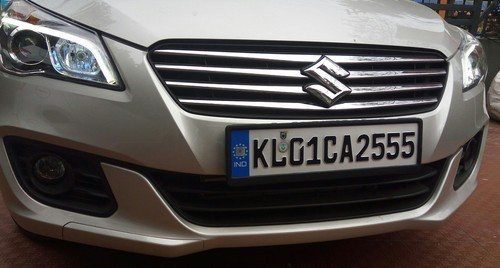

In [33]:
fig = px.imshow(image)
fig.update_layout(width=700, height=500,  margin=dict(l=10, r=10, b=10, t=10), xaxis_title='Figure 13 - TEST Image')

In [34]:
image_arr_224.shape

(224, 224, 3)

In [35]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [36]:
# Make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 5s 5s/step


array([[0.53932106, 0.93118906, 0.5652925 , 0.6975973 ]], dtype=float32)

In [37]:
# Denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[269.66053247, 465.59453011, 151.498384  , 186.95608306]])

In [41]:
coords = coords.astype(np.int32)
coords

array([[269, 465, 151, 186]], dtype=int32)

In [42]:
# Draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)

(269, 151) (465, 186)



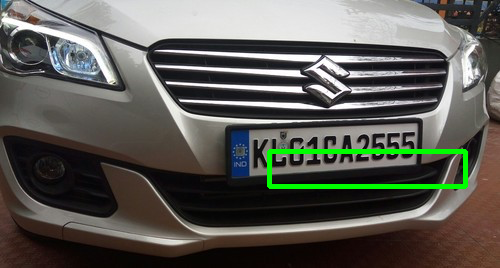

In [43]:
cv2.rectangle(image,pt1,pt2,(0,255,0),3)
fig = px.imshow(image)
fig.update_layout(width=700, height=500, margin=dict(l=10, r=10, b=10, t=10))

1/1 [==============================] - 0s 302ms/step
(269, 151) (465, 186)



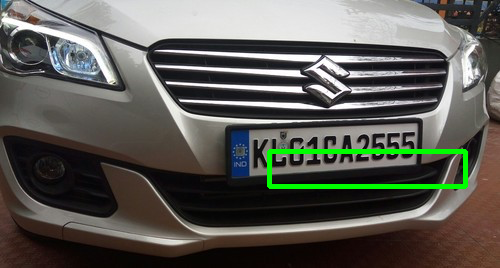

In [44]:
# Create pipeline
path = '/content/Artificial-Intelligence-and-Machine-Vision/Vehicles-License-Plate-Detection-using-Deep-Learning-and-Computer-Vision-Techniques/images/Cars0.png'
def object_detection(path):
    
    # Read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    
    # Data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # Convert to array & normalized
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    
    # Make predictions
    coords = model.predict(test_arr)
    
    # Denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    
    # Draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

image, cods = object_detection(path)

fig = px.imshow(image)
fig.update_layout(width=700, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 14')


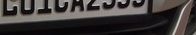

In [45]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]
fig = px.imshow(roi)
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 15 Cropped image')

In [46]:
# extract text from image
text = pt.image_to_string(roi)
print(text)